# NetworkX Introduction - Lab

## Introduction

In this lab, you'll practice some of the introductory skills for creating graphs using the NetworkX library introduced in the previous lesson. To do this, you'll create a graph to visualize users and businesses from yelp reviews. 

## Objectives

In this lab you will: 

- Create basic network graphs with networkx 
- Add nodes and edges to networkx graphs 
- Visualize network graphs with networkx 

## Import the Data

To start, import the data stored in the file `'Yelp_reviews.csv'`. 

In [1]:
import pandas as pd 

data = pd.read_csv('Yelp_reviews.csv')
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,7SO_rX1F6rQEl-5s3wZxgQ,2011-10-03,GxaYFCprt-wyqO--vB4PHQ,4,"After my last review, somewhat scathing regard...",review,J3I2NClEbD1Xr8lOdjxlqQ,1,2,1
1,K2_Hmmo5crTYWiT_1sWnfQ,2011-12-22,FSrIgThMfFIh__TubVQkxw,3,"Ok, so I'm catching up on past-due reviews. F...",review,J3I2NClEbD1Xr8lOdjxlqQ,0,0,0
2,FeI75xIG8PF_XZ6P80gLBQ,2012-06-04,eeJ10gamdNebtq028i0BvA,3,"I want to like Turf, but the food is just okay...",review,64YY0h0ZAR2nbzxbx0IwJg,2,1,0
3,6imLt53br7SJ3av07jjH7w,2012-11-06,SPDbkT9WXghJedf1xxYnOg,5,It's the place to be. \n\nI went before headin...,review,Ypz7hxOCnrg8Y8vxHJU-sQ,0,0,0
4,zmFc8M-hS4uuyY0hklIpoQ,2011-01-17,A2lCUSvDJfIa5kwUoFFk8A,4,A definite favorite in the neighborhood.\n\nTh...,review,nDBly08j5URmrHQ2JCbyiw,2,3,2


In [2]:
data.shape

(76, 10)

## Creating a Graph

Now, create an initial graph!

In [3]:
import networkx as nx
G = nx.Graph()

## Adding Nodes 

Create a node for each user and each business in the dataset. Networks with multiple node types like this are called **bimodal networks**.

Optionally, go further by creating a list of colors for when you visualize the graph. If you do this, append the color "green" to your color list every time you add a user node and append the color "blue" to your color list every time you add a business node.

In [5]:
names = {}
node_color = []
for n, person in enumerate(data.user_id.unique()):
    name = 'User{}'.format(n)
    names[person] = name
    G.add_node(name)
    node_color.append('green')
for n, biz in enumerate(data.business_id.unique()):
    name = 'Business{}'.format(n)
    names[biz] = name
    G.add_node(name)
    node_color.append('blue')  

In [6]:
names

{'J3I2NClEbD1Xr8lOdjxlqQ': 'User0',
 '64YY0h0ZAR2nbzxbx0IwJg': 'User1',
 'Ypz7hxOCnrg8Y8vxHJU-sQ': 'User2',
 'nDBly08j5URmrHQ2JCbyiw': 'User3',
 '8qSr4B1NJL99rlylewUjOw': 'User4',
 'V1k7XMUX4qHVUi-3IUYzhA': 'User5',
 'w225lKHnX3jorkSXWgss0Q': 'User6',
 'JffajLV-Dnn-eGYgdXDxFg': 'User7',
 'wLuDGMXytNVTF8ZU2gwUEQ': 'User8',
 'X_kPh3nt0AJPNPHye2rTlA': 'User9',
 'xkTbpCc-YhU8-EXZDA7u0g': 'User10',
 '3SIjo6vQIvxwHKEpIHfaBg': 'User11',
 'APLIPfq1Rf8QyhHHk2uAyA': 'User12',
 'SW5RpjVtyMhxdzuA8dOdYA': 'User13',
 '-OMlS6yWkYjVldNhC31wYg': 'User14',
 'nSLrExcVVphiNzvSf5H7vA': 'User15',
 '-txH2zJSBZQHO6RWvoWXuQ': 'User16',
 'yy8vNTtESId44OcGyaVnbw': 'User17',
 'ehtcnF3Ebvq23p107LcsuA': 'User18',
 'XMEBJp8mmpz3vsSkvg9T9Q': 'User19',
 'tiyg_cQaPdUuSG95Xpi_sA': 'User20',
 'd1zJj49Q5ikgvqQX0534RQ': 'User21',
 'vhAn390OgR1H4DwacJdc7w': 'User22',
 'Lmgv46LyI1PlLs0KNIfYFQ': 'User23',
 'ryjqXdp68i2I9JPOpX9URw': 'User24',
 'W_QXYA7A0IhMrvbckz7eVg': 'User25',
 'clTYUJCL-rHnVIS2WePRwA': 'User26',
 'k1ACFw3wm

## Adding Edges

Next, iterate through the dataset and create an edge between users and the businesses they have reviewed.

In [9]:
for row in data.index:
    user = data['user_id'][row]
    u_name = names[user]
    biz = data['business_id'][row]
    b_name = names[biz]
    G.add_edge(u_name, b_name)

## Visualizing the Graph

Finally, create a visualization of your network. If you chose to color your nodes, pass the list of colors through the optional `node_color` parameter.

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


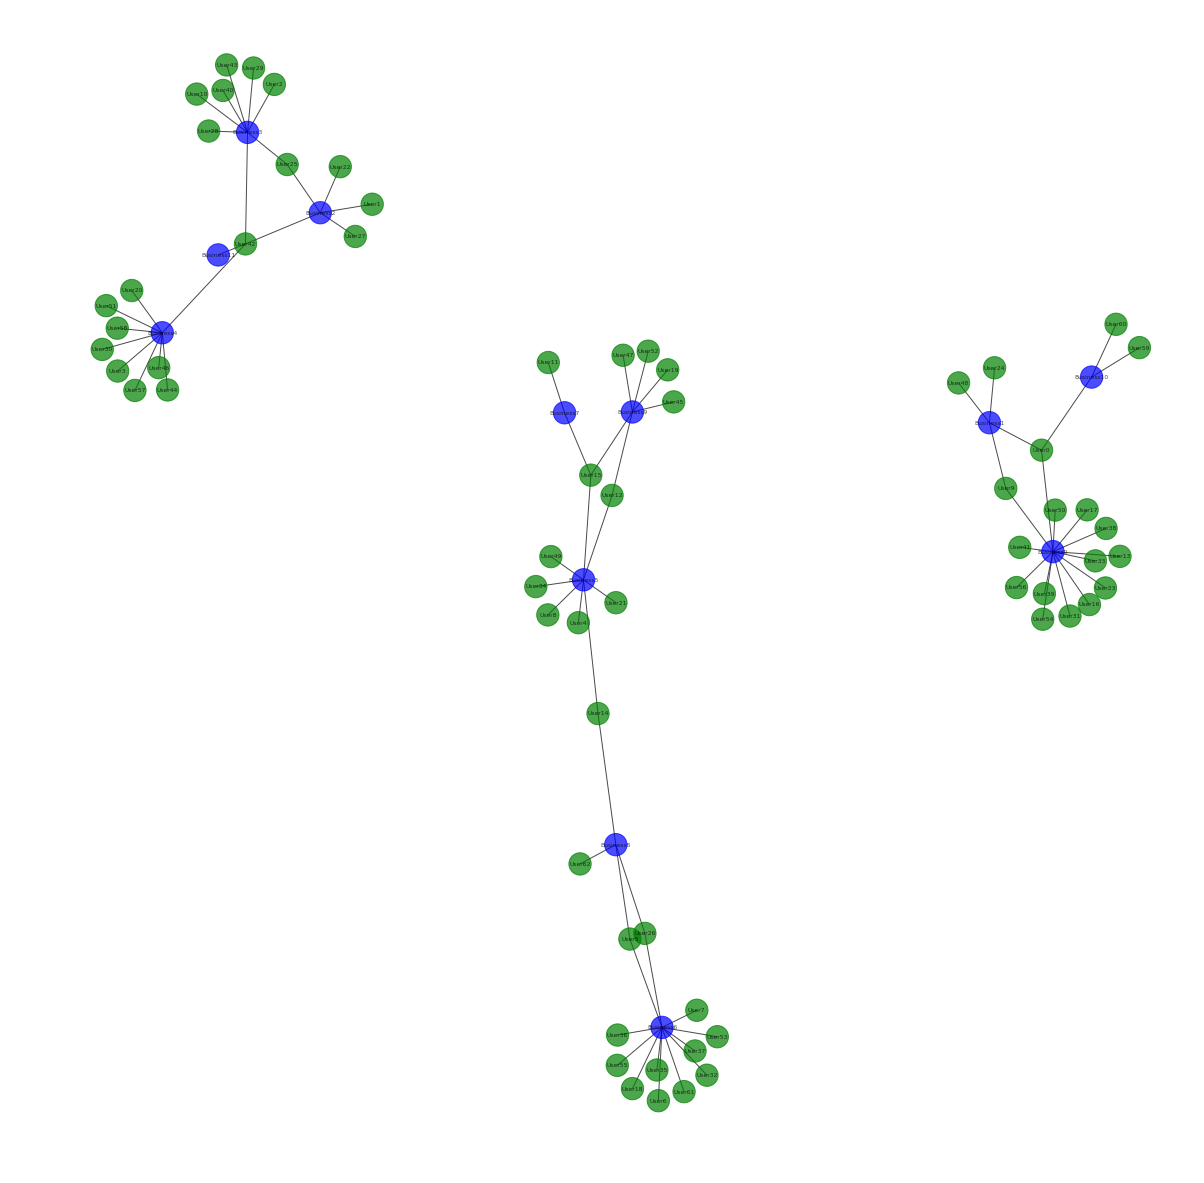

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
nx.draw(G, with_labels=True, alpha=0.7, font_size=6, node_size=500, node_color=node_color)

## Summary

Nice work! In this lab you created an initial network to visualize a bimodal network of businesses and yelp reviewers!